In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from bokeh.plotting import figure, save
import os
# IMPORTANT NOTE: having difficulting writing the crs to shp using geopands to_file
# Can do it manually using notepad++ though. WORK IN PROGRESS
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline
import janmaps as jm # personal functions for mapping

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='XXX',api_key='XXX')
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)

In [5]:
p = figure(title = 'My first interactive plot')
AWU = gpd.read_file(r'D:\Documents\ML\Geo\shapefiles\ServiceArea\AWUServiceArea.shp')
zpco = gpd.read_file(r'D:\Documents\ML\Geo\shapefiles\zipcodes\Austinzipcodes.shp')

In [20]:
df = pd.read_excel(r'D:\Documents\ML\Geo\Leaks_forCo.xlsx',sheet_name='Sheet1')

In [24]:
coordX = df.X
coordY = df.Y

# Create geodataframe from data
pts_geometry = [Point(xy) for xy in zip(coordX, coordY)]
pts_crs = {'init':'epsg:4326'}
points = gpd.GeoDataFrame(df, crs=pts_crs, geometry=pts_geometry)

In [17]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [15]:
CRS = AWU.crs
print(CRS)

{'init': 'epsg:4326'}


In [16]:
zpco['geometry'] = zpco['geometry'].to_crs(crs=CRS)

In [18]:
AWU['x'] = AWU.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
AWU['y'] = AWU.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

zpco['x'] = zpco.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
zpco['y'] = zpco.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

In [37]:
points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 29 columns):
HomeNo                3885 non-null int64
SubAddress1           479 non-null object
StName                3885 non-null object
SubAddress2           3820 non-null object
SubAddress3           275 non-null object
City                  3884 non-null object
ZIP                   3885 non-null int64
AddressID             3885 non-null int64
MapZone               1373 non-null object
ObjectID              3885 non-null int64
Y                     3885 non-null float64
X                     3885 non-null float64
ProblemDescription    3885 non-null object
ServiceNo             1381 non-null float64
WorkOrderNo           2263 non-null object
ReportLeakTime        1381 non-null float64
ReportLeakTime2       1381 non-null datetime64[ns]
LeakInspectTime       1381 non-null float64
LeakInspectTime2      1381 non-null datetime64[ns]
LeakRepairedTime      3885 non-null int64
LeakRepaire

In [34]:
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

Text(0.5,1,'Points Data')

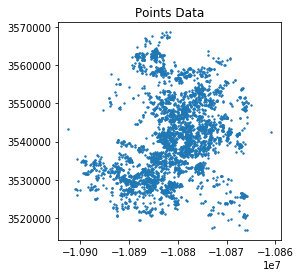

In [29]:
#plt.plot(coordX, coordY, marker='o', color='C0', linestyle='None', markersize=2)
fig, ax = plt.subplots(figsize=[4,4])
points.plot(ax=ax, marker='o', markersize=2)
plt.title('Points Data')

In [38]:
zip_df = zpco.drop('geometry',axis =1).copy()
zsource = ColumnDataSource(zip_df)
AWU_df = AWU.drop('geometry',axis =1).copy()
asource = ColumnDataSource(AWU_df)
p_df = points.copy()
psource = ColumnDataSource(p_df)

In [47]:
p = figure(title="Travel times with Public transportation to Central Railway station")

# Plot grid
p.patches('x', 'y', source=zsource,
         fill_color={'field': 'pt_r_tt_ud', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

# Add metro on top of the same figure
#p.multi_line('x', 'y', source=zsource, color="red", line_width=2)

# Add points on top (as black points)
p.circle('x', 'y', size=3, source=psource, color="black")


# Save the figure
outfp = r'D:\Documents\ML\Geo\a.html'
save(obj=p, filename=outfp)

C:\Users\ASUS\Anaconda3\lib\site-packages\bokeh\io\saving.py:125: UserWarning:

save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN

C:\Users\ASUS\Anaconda3\lib\site-packages\bokeh\io\saving.py:138: UserWarning:

save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'



RuntimeError: Sub-model (id='11db63ad-323c-4013-a4da-a1de4f770783', ...) of the root model Figure(id='8346c71d-a954-484e-b5ff-02b252c17962', ...) is already owned by another document (Models must be owned by only a single document). This may indicate a usage error.